# Association Rules

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori,association_rules 
import matplotlib.pyplot as plt
import plotly as plot
import seaborn as sns

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
movies=pd.read_csv("C:\\Users\\MOHD SHOEB\\OneDrive\\Desktop\\Excelr Assignments\\Association Rules\\my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
movies1=movies.drop(movies.iloc[:,:5],axis=1)
movies1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [4]:
movies1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
freq_movies=apriori(movies1,min_support=0.1,use_colnames=True)
freq_movies.head()

C:\Users\MOHD SHOEB\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)


In [6]:
freq_movies.sort_values('support',ascending=False)

,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
17,0.6,"(Gladiator, Patriot)"
10,0.5,"(Gladiator, Sixth Sense)"
30,0.4,"(Gladiator, Patriot, Sixth Sense)"
13,0.4,"(Patriot, Sixth Sense)"
9,0.2,(Green Mile)
22,0.2,"(LOTR1, LOTR2)"
16,0.2,"(Green Mile, Sixth Sense)"


In [7]:
rules=association_rules(freq_movies,min_threshold=0.7,metric='lift')
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96,-0.333333
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80,-0.200000
...,...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(Harry Potter1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
246,(Harry Potter1),"(LOTR1, Green Mile, LOTR2, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
247,(LOTR2),"(LOTR1, Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80,1.000000
248,(Sixth Sense),"(LOTR1, Green Mile, LOTR2, Harry Potter1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08,1.000000


In [8]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
210,"(LOTR1, Green Mile)","(Harry Potter1, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
187,"(LOTR2, Sixth Sense)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
182,"(LOTR1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
140,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
137,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
64,"(LOTR1, LOTR2)",(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800000,-0.200000
21,(Green Mile),(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333
55,(Gladiator),"(Green Mile, Sixth Sense)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333,-0.571429
54,"(Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000,-0.333333


In [9]:
rules_movies1=association_rules(freq_movies,metric='lift',min_threshold=1.3)
rules_movies1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
195,"(Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
193,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
206,"(LOTR1, Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
178,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
165,"(Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
30,(Gladiator),"(Sixth Sense, Patriot)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
119,"(Green Mile, LOTR, Sixth Sense)",(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf,0.333333
29,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
28,"(Gladiator, Sixth Sense)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [10]:
rules_movies1['lhs items'] = rules_movies1['antecedents'].apply(lambda x:len(x) )
rules_movies1[rules_movies1['lhs items']>1].sort_values('lift', ascending=False).head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs items
125,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
178,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
212,"(Harry Potter1, Green Mile, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,3
86,"(Gladiator, Green Mile)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2
176,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf,1.0,2


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5]),
 [Text(0.5, 0, 'Braveheart'),
  Text(2.5, 0, 'Gladiator,Green Mile'),
  Text(4.5, 0, 'Gladiator,Sixth Sense'),
  Text(6.5, 0, 'Green Mile,LOTR'),
  Text(8.5, 0, 'Green Mile,LOTR2,Sixth Sense'),
  Text(10.5, 0, 'Harry Potter1'),
  Text(12.5, 0, 'Harry Potter1,Green Mile,LOTR2'),
  Text(14.5, 0, 'Harry Potter1,LOTR1'),
  Text(16.5, 0, 'Harry Potter1,LOTR2,Sixth Sense'),
  Text(18.5, 0, 'LOTR'),
  Text(20.5, 0, 'LOTR1'),
  Text(22.5, 0, 'LOTR1,Green Mile,Harry Potter1'),
  Text(24.5, 0, 'LOTR1,Green Mile,Sixth Sense'),
  Text(26.5, 0, 'LOTR1,LOTR2'),
  Text(28.5, 0, 'LOTR1,LOTR2,Sixth Sense'),
  Text(30.5, 0, 'LOTR1,Sixth Sense,Harry Potter1'),
  Text(32.5, 0, 'LOTR2,Sixth Sense'),
  Text(34.5, 0, 'Sixth Sense')])

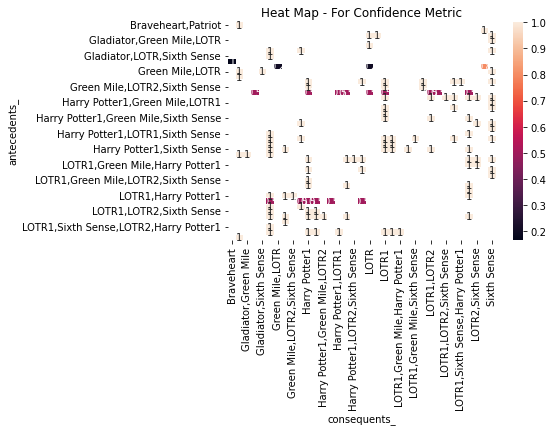

In [11]:
rules_movies1['antecedents_'] =rules_movies1['antecedents'].apply(lambda a: ','.join(list(a)))
rules_movies1['consequents_'] =rules_movies1['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the confidence metric
pivot = rules_movies1[rules_movies1['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'confidence')
# Generate a heatmap with annotations 
sns.heatmap(pivot, annot = True)
plt.title('Heat Map - For Confidence Metric')
plt.yticks(rotation=0)
plt.xticks(rotation=90)